### What is Manifold Learning?

- `Manifold learning` is a type of nonlinear dimensionality reduction technique.
- It is based on the idea that high-dimensional data often lies on a lower-dimensional "manifold" (a smooth, curved surface) inside that high-dimensional space.

### Example

- Imagine a piece of paper (2D surface).
- You can roll it into a tube or twist it into a Swiss roll shape.
- Even though the paper now exists in 3D space, all the points on it still lie on a 2D manifold (the paper surface).

Manifold learning algorithms try to "unroll" this paper and find the true lower-dimensional structure of the data.

- Traditional PCA assumes that the important structure is linear (straight lines).
- But in reality, data often lies on a nonlinear surface.
- Manifold learning methods capture these curved, nonlinear relationships.

### Key Characteristics

- Works for `nonlinear structures` in data.
- Preserves either:
    - Local geometry (distances or neighborhoods), or
    - Global structure (overall manifold shape).
- Useful for visualization, compression, and feature extraction.

### Common Manifold Learning Algorithms

- **Multidimensional Scaling (MDS)** – preserves pairwise distances between points for visualization in lower dimensions.
- **Isomap** – preserves global geodesic distances along the manifold.
- **Locally Linear Embedding (LLE)** – preserves local neighborhood relationships.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)** – great for visualizing clusters in 2D/3D.
- **UMAP (Uniform Manifold Approximation and Projection)** – preserves both local and global structure, often better than t-SNE for speed and scalability.


### Multidimensional Scaling (MDS)

- **Multidimensional Scaling (MDS)** is a dimensionality reduction and visualization technique that represents high-dimensional data in a lower-dimensional space (usually 2D or 3D).  
- It works by preserving the **distances (similarities or dissimilarities)** between objects as much as possible.  

**Example of Preserving Distances:**  
Imagine three objects A, B, and C in high-dimensional space with the following pairwise distances:

| Pair | Distance |
|------|----------|
| A-B  | 2        |
| A-C  | 5        |
| B-C  | 4        |

After reducing to 2D with MDS, the points might be placed so that:

- Distance A-B ≈ 2  
- Distance A-C ≈ 5  
- Distance B-C ≈ 4  

Even though the data is now in 2D, the relative closeness of points is maintained. Points that were close in the original space remain close, and points that were far apart remain far, giving a meaningful low-dimensional representation.

#### Types of Multidimensional Scaling (MDS)

1. **Classical MDS (Torgerson scaling):**  
   - **Goal:** Find a low-dimensional embedding that preserves distances **exactly** if they are Euclidean.  
   - **How it works:**  
     - Starts with a distance matrix between objects (assumes **Euclidean distances**).  
     - Converts distances into a matrix suitable for **eigenvalue decomposition**.  
     - **Eigenvalue decomposition**: a linear algebra technique that splits a square matrix into:
       - **Eigenvectors:** define the new axes (directions) in the low-dimensional space.  
       - **Eigenvalues:** indicate how much “variance” or information each axis captures.  
     - The coordinates of objects in low dimensions are computed directly from the eigenvectors and eigenvalues.  
   - **Key features:**  
     - Closed-form solution — no iterative optimization is needed.  
     - Equivalent to PCA for Euclidean distances: both find axes that capture variance in the same way.  
   - **Example:**  
     - Original distances: A-B = 3, A-C = 5, B-C = 4.  
     - Classical MDS can place A, B, C in 2D so that these distances are **exactly preserved**.  

2. **Metric MDS:**  
   - **Goal:** Preserve the **actual distances** between objects as closely as possible, even if distances are non-Euclidean.  
   - **How it works:**  
     - Starts with a distance matrix (Euclidean or non-Euclidean).  
     - Uses **iterative stress minimization**: repeatedly adjusts points in low-dimensional space to minimize the difference between embedded distances and original distances.  
     - Stops when the embedding distances are as close as possible to the original distances (minimum “stress”).  
   - **Key features:**  
     - Can handle non-Euclidean distances.  
     - No closed-form solution — requires iteration.  
   - **Example:**  
     - Original distances: A-B = 3.2, A-C = 4.9, B-C = 4.1 (non-Euclidean).  
     - Metric MDS finds a 2D placement that approximates these distances as closely as possible.  

3. **Non-metric MDS:**  
   - **Goal:** Preserve only the **rank order** of distances (ordinal information) rather than exact numerical values.  
   - **How it works:**  
     - Uses the ordering of distances (which points are closer or farther).  
     - Iteratively adjusts points in low-dimensional space to maintain this ranking.  
     - Exact distance values are ignored.  
   - **Key features:**  
     - Useful for subjective or noisy distance data (e.g., human similarity ratings).  
     - Emphasizes relative positioning rather than precise distances.  
   - **Example:**  
     - Original distances: A-B < B-C < A-C.  
     - Non-metric MDS embeds points in 2D so the same order of closeness is preserved: A-B remains closest, B-C next, A-C farthest.  

**Summary of differences:**

| Type | Preserves | Method | Example |
|------|-----------|--------|---------|
| Classical MDS | Exact distances (Euclidean only) | Eigenvalue decomposition (closed-form) | Distances A-B=3, A-C=5, B-C=4 exactly preserved |
| Metric MDS | Actual distances (approximate if non-Euclidean) | Iterative stress minimization | Distances A-B≈3.2, A-C≈4.9, B-C≈4.1 closely matched |
| Non-metric MDS | Rank order of distances only | Iterative stress minimization | Only A-B < B-C < A-C order preserved, exact numbers ignored |


### Isomap (Isometric Feature Mapping)

- **Isomap** is a **nonlinear manifold learning** technique for dimensionality reduction.  
- It extends **Classical MDS** to handle **nonlinear structures** in data by preserving **geodesic distances** (distances along the manifold) rather than straight-line Euclidean distances.  

#### How Isomap Works

1. **Construct a neighborhood graph:**  
   - Connect each point to its **k nearest neighbors** (or points within a certain radius).  
   - This creates a graph that approximates the local structure of the manifold.  

2. **Compute geodesic distances:**  
   - Geodesic distance = shortest path along the graph between two points.  
   - Use algorithms like **Dijkstra’s** or **Floyd-Warshall** to compute these shortest paths.  
   - This captures the intrinsic distances along the curved manifold, unlike straight-line Euclidean distances.  

3. **Apply Classical MDS:**  
   - Take the geodesic distance matrix and use **Classical MDS** to embed the data in a lower-dimensional space (2D or 3D).  
   - This preserves the **nonlinear manifold structure** as faithfully as possible.  

#### Key Features

- Preserves **global structure** of the data along the manifold.  
- Can handle **nonlinear relationships** that PCA or classical MDS would fail to capture.  
- Sensitive to the choice of **neighborhood size (k)**: too small → disconnected graph, too large → approximates Euclidean distances.  

#### Example

- Imagine points lying on a **“Swiss roll”** (a 2D surface rolled in 3D space).  
- Straight-line distances between points on opposite layers are large, even though they are close along the manifold.  
- Isomap computes geodesic distances along the roll and embeds the data in 2D, “unrolling” the surface while preserving intrinsic distances.   

### Locally Linear Embedding (LLE)

- **Locally Linear Embedding (LLE)** is a **nonlinear manifold learning** technique for dimensionality reduction.  
- Unlike Isomap, LLE focuses on **preserving local neighborhood relationships** rather than global distances.  

#### How LLE Works

1. **Identify local neighbors:**  
   - For each point in high-dimensional space, find its **k nearest neighbors**.  
   - These neighbors define the local patch or neighborhood around the point.

2. **Compute reconstruction weights:**  
   - Each point is represented as a **linear combination of its neighbors**.  
   - Solve for weights \(w_{ij}\) that minimize the reconstruction error:
     \[
     \text{Error} = \sum_i \left\| x_i - \sum_{j \in \text{neighbors}(i)} w_{ij} x_j \right\|^2
     \]  
   - This step captures the **local geometry** of the manifold.

3. **Compute low-dimensional embedding:**  
   - Find coordinates in a lower-dimensional space that **preserve these reconstruction weights**.  
   - Solve an eigenvalue problem to get the final embedding.  

#### Key Features

- Preserves **local structure** (how points relate to their neighbors).  
- Good for manifolds where **local linearity** holds but global structure may be curved.  
- Sensitive to the number of neighbors (k): too small → disconnected embedding, too large → local linearity assumption may break.  

#### Example

- Imagine points lying on a **Swiss roll** (2D surface in 3D).  
- LLE focuses on small patches along the roll: each point is approximated by its nearest neighbors.  
- The embedding “unfolds” the roll while keeping the local relationships intact.  
- Unlike Isomap, LLE does **not explicitly preserve global geodesic distances**.  

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

- **t-SNE** is a **nonlinear dimensionality reduction** technique primarily used for **visualizing high-dimensional data in 2D or 3D**.  
- It focuses on **preserving local neighbor relationships**, making clusters of similar points easily visible.  

#### How t-SNE Works (Intuition)

1. **Convert distances to probabilities:**  
   - In high-dimensional space, the similarity between points is modeled as a **probability** that one point would pick another as its neighbor.  
   - Points that are close have **high probability**, points far away have **low probability**.

2. **Define a similar probability in low-dimensional space:**  
   - Low-dimensional coordinates are initialized randomly.  
   - Similar probabilities are computed using a **Student’s t-distribution** (heavier tails than Gaussian).  
   - This allows distant points to stay far apart and avoids “crowding” in low dimensions.

3. **Minimize the difference (KL divergence):**  
   - Use **gradient descent** to minimize the difference between the high-dimensional and low-dimensional probabilities.  
   - This ensures that **local neighborhoods are preserved**, while points that are not similar are pushed apart.  

#### Key Features

- Excellent for **visualizing clusters**.  
- Emphasizes **local structure** over global structure: distances between far-away clusters may not reflect original distances.  
- Computationally intensive for very large datasets (though optimizations exist).  
- Nonlinear technique: captures complex relationships that PCA or MDS cannot.  

#### Example

- Suppose you have images of digits 0–9 in high-dimensional pixel space.  
- t-SNE can embed these images into 2D such that each digit forms a **tight cluster**, even though pixel-space distances are complex.  
- Points representing the same digit are placed close together, points of different digits are farther apart.  

### UMAP (Uniform Manifold Approximation and Projection)

- **UMAP** is a **nonlinear dimensionality reduction** technique for visualizing and analyzing high-dimensional data in 2D or 3D.  
- It aims to **preserve both local and global structure** of the data better than t-SNE, while being faster and scalable to large datasets.  

#### How UMAP Works (Intuition)

1. **Construct a fuzzy topological representation of the data:**  
   - Compute a **weighted k-nearest neighbor graph** in high-dimensional space.  
   - Weights reflect the **strength of connection** between neighboring points.  
   - This graph captures the **local manifold structure**.  

2. **Optimize low-dimensional embedding:**  
   - Find coordinates in 2D or 3D that **best preserve the graph structure**.  
   - Optimization balances **local structure preservation** (keeping neighbors together) and **global structure** (maintaining overall shape).  

3. **Uses Riemannian geometry and fuzzy simplicial sets:**  
   - Provides a principled mathematical framework for manifold approximation.  
   - Captures both **local neighborhoods** and some **global relationships** efficiently.  

#### Key Features

- Preserves **local relationships** like t-SNE but also retains **global structure** better.  
- **Fast and scalable** to large datasets.  
- Nonlinear technique: captures complex manifold structures.  
- Often used for visualization, clustering, and preprocessing for machine learning. 

#### Example

- Suppose you have gene expression data with thousands of features.  
- UMAP can embed these samples in 2D, revealing clusters of cells with similar expression patterns.  
- Local clusters are preserved, and the overall structure (e.g., trajectories or gradients) remains interpretable.  


#### Comparison of Manifold Learning Methods

| Method | Preserves | Focus | Notes |
|--------|-----------|-------|-------|
| PCA / Classical MDS | Linear variance / Euclidean distances | Global | Linear method |
| Isomap | Global geodesic distances | Global | Captures manifold structure |
| LLE | Local neighborhood relationships | Local | Preserves local geometry |
| **t-SNE** | Local neighbor probabilities | Local | Great for visualizing clusters, may distort global distances |
| UMAP | Local + global structure | Local + global | Faster, preserves both local and some global structure |

### Manifold implementation

#### Import Libraries

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
import umap.umap_ as umap

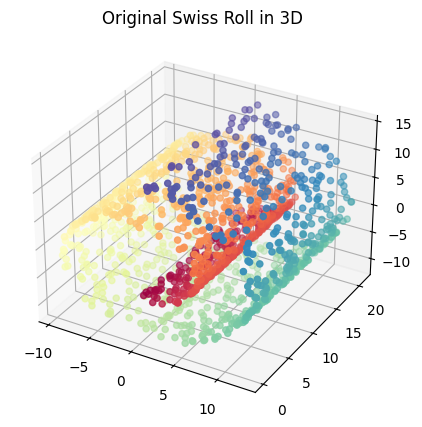

In [3]:
# Generate the Swiss Roll dataset
n_samples = 1500
noise = 0.05
X, t = make_swiss_roll(n_samples=n_samples, noise=noise)

# Plot the 3D Swiss Roll
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll in 3D")
plt.show()

#### Applying Manifold Learning (Isomap and LLE)

- `n_components` specifies the dimensionality of the output embedding — i.e., the number of dimensions you want to reduce the data to.
    - For `PCA`: n_components often corresponds to principal components, which are directions capturing maximum variance.
    - For `Manifold Learning methods` (Isomap, LLE, t-SNE, UMAP): n_components simply defines the target dimensionality, e.g., 2D or 3D for visualization.

- `Isomap`: “Unrolls” the manifold while preserving global geodesic distances.
- `LLE`: Preserves local neighborhood relationships, unfolds the manifold while keeping local geometry intact.
- `t`: Color corresponds to the position along the manifold, showing how the algorithm unfolds the data.

In [10]:
# Apply manifold learning techniques
# 1. Isomap
isomap = Isomap(n_neighbors=10, n_components=2)
X_iso = isomap.fit_transform(X)

# 2. LLE
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X_lle = lle.fit_transform(X)

# 3. t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

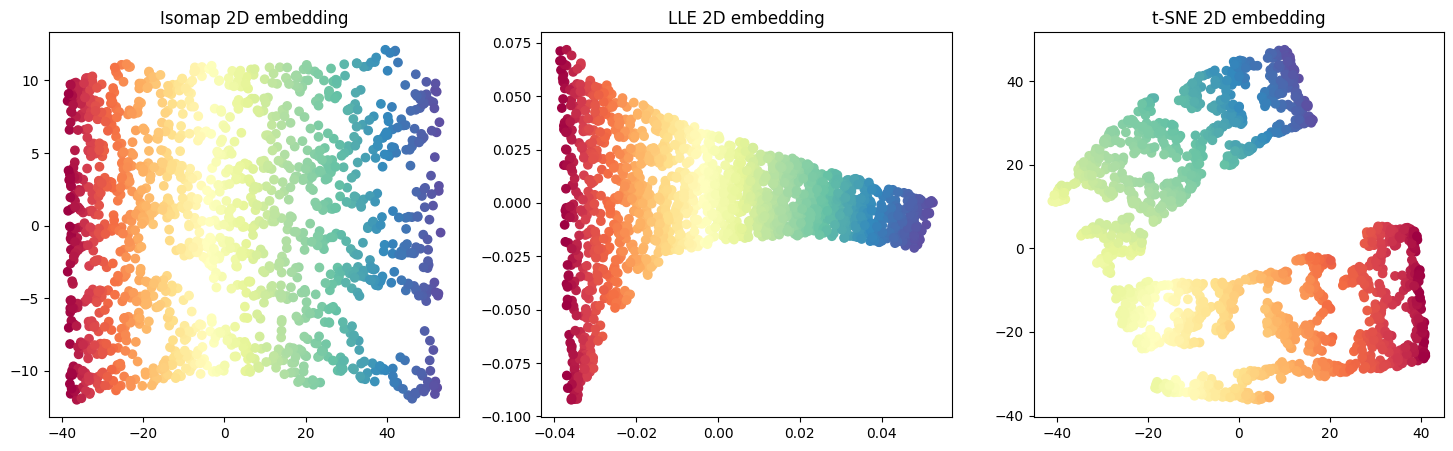

In [13]:
# Plot 2D embeddings for 3 methods
fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 row, 3 columns

axes[0].scatter(X_iso[:,0], X_iso[:,1], c=t, cmap=plt.cm.Spectral)
axes[0].set_title("Isomap 2D embedding")

axes[1].scatter(X_lle[:,0], X_lle[:,1], c=t, cmap=plt.cm.Spectral)
axes[1].set_title("LLE 2D embedding")

axes[2].scatter(X_tsne[:,0], X_tsne[:,1], c=t, cmap=plt.cm.Spectral)
axes[2].set_title("t-SNE 2D embedding")

plt.show()